In [91]:
# !pip install pyreadstat

In [92]:
# sav 파일 다운 경로: 
# https://drive.usercontent.google.com/download?id=1zaZjaxgOiBuUYOex0yu35R7L8EK5r-iQ&export=download

# 출판사 자료 깃허브: 
# https://github.com/youngwoos/Doit_Python/blob/main/Notebook/09.ipynb

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt



In [94]:
raw_welfare = pd.read_spss('./data/Koweps_hpwc14_2019_beta2.sav')

welfare = raw_welfare.copy()

In [95]:
welfare
welfare.shape
welfare.info()
welfare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [96]:
welfare = welfare.rename(
    columns={'h14_g3'   :   'sex',
             'h14_g4'   :   'birth',
             'h14_g10'   :   'marriage_type',
             'h14_g11'   :   'religion',
             'p1402_8aq1'   :   'income',
             'h14_eco9'   :   'code_job',
             'h14_reg7'   :   'code_region',
             }
)

In [97]:
#p229
welfare['sex'].dtypes

dtype('float64')

In [98]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [99]:
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
welfare['sex'].isna().sum()

np.int64(0)

In [100]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

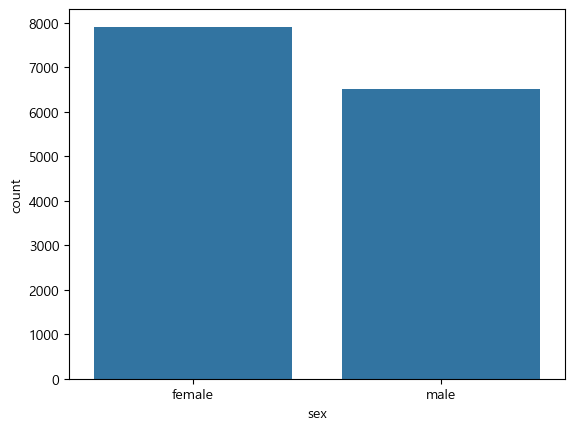

In [101]:
sns.countplot(data=welfare, x='sex')

In [102]:
welfare['income'].dtypes

dtype('float64')

In [103]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

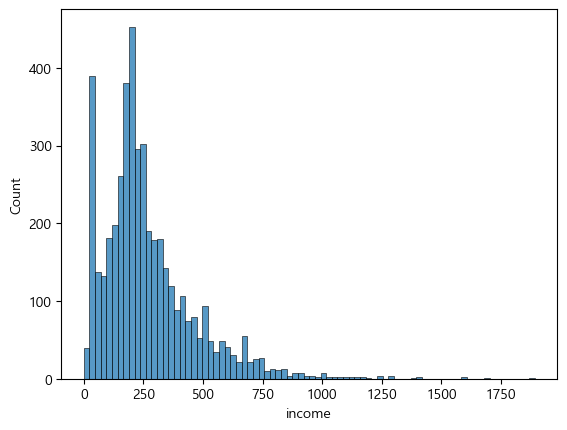

In [104]:
sns.histplot(data=welfare, x='income')

In [105]:
welfare['income'].isna().sum()

np.int64(9884)

In [106]:
#p234

sex_income = welfare.dropna(subset=['income']).groupby('sex', as_index=False).agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

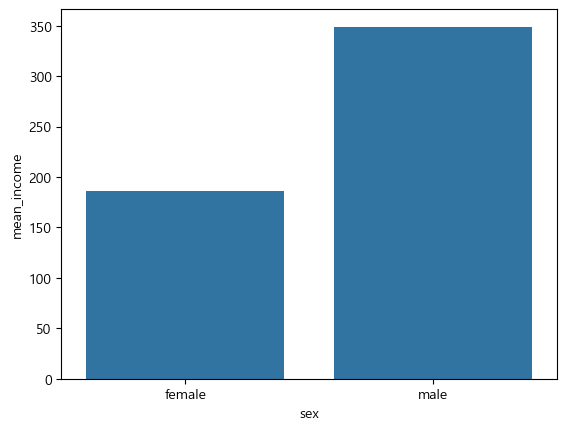

In [107]:
sns.barplot(data=sex_income, x='sex', y='mean_income')

In [108]:
welfare['birth'].dtypes

dtype('float64')

In [109]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

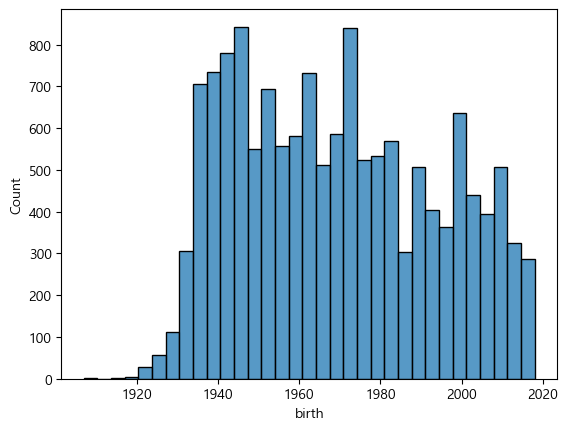

In [110]:
sns.histplot(data=welfare, x='birth')

In [111]:
welfare['birth'].isna().sum()

np.int64(0)

In [112]:
birth75 = welfare['birth'].quantile(.75) 
birth25 = welfare['birth'].quantile(.25)
birthiqr = birth75 - birth25 
birthiqr

np.float64(42.0)

In [113]:
#이상치가 있는지 보려고 극단값을 봤는데 max가 극단치 보다 작음

birthmax = birthiqr *1.5 + birth75
birthmax

np.float64(2053.0)

In [114]:
#이상치가 있는지 보려고 극소값을 봤는데 min가 극소값 보다 큼

birthmin = birth25 - birthiqr *1.5 
birthmin

np.float64(1885.0)

In [115]:
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])
welfare['birth'].isna().sum()

np.int64(0)

In [116]:
#p238

welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

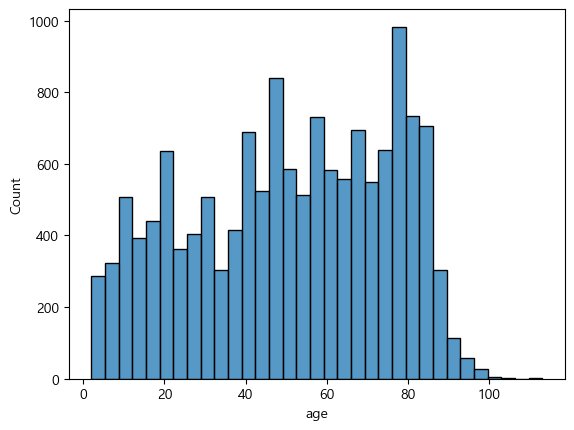

In [117]:
sns.histplot(data=welfare, x='age')

In [118]:
age_income = welfare.dropna(subset=['income']).groupby('age').agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

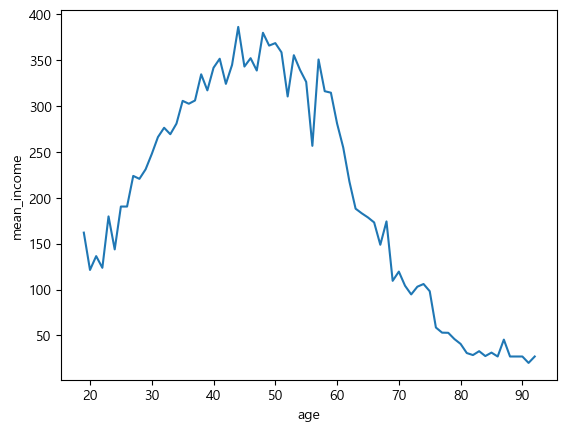

In [119]:
sns.lineplot(data=age_income, x='age', y='mean_income')

#p240 연령대에 따른 월급차이

In [120]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [121]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old'))
                        )
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

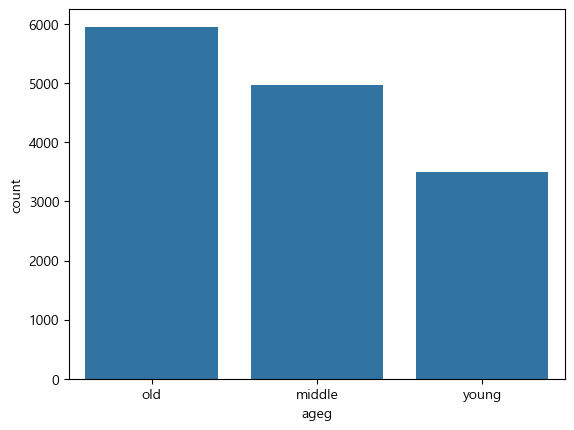

In [122]:
sns.countplot(data=welfare, x='ageg')

##p248 연령대별 월급 차이 분석

In [123]:
ageg_income = welfare.dropna(subset= ['income']).groupby('ageg', as_index= False).agg(mean_income = ('income', 'mean'))

In [124]:
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='ageg', ylabel='mean_income'>

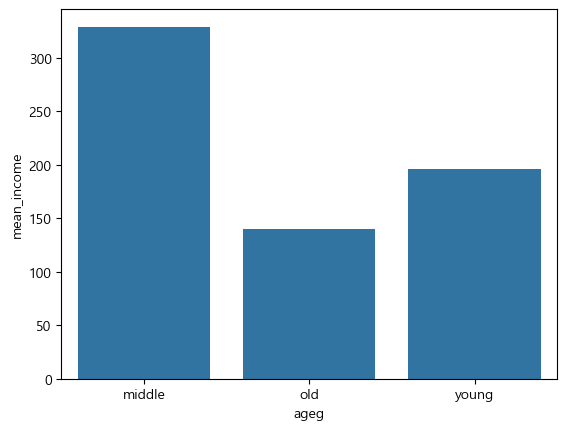

In [125]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

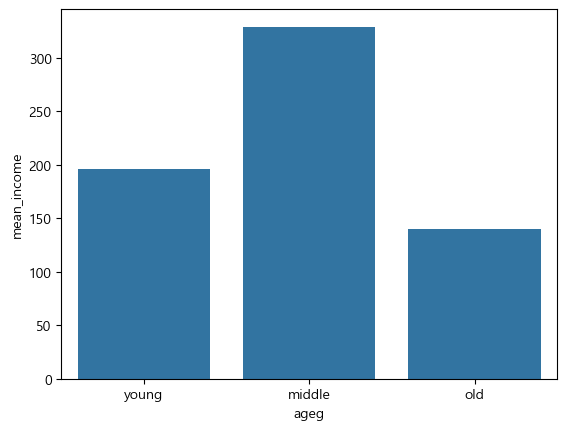

In [126]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income', order= ['young', 'middle', 'old'])

In [127]:
sex_income = welfare.dropna(subset=['income']).groupby(['ageg', 'sex'], as_index=False).agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

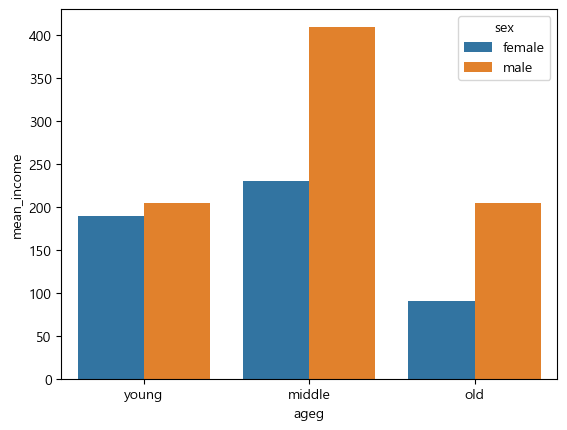

In [128]:
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex', order=['young', 'middle', 'old'])

In [129]:
#p246
sex_age = welfare.dropna(subset=['income']).groupby(['age', 'sex'], as_index=False).agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<Axes: xlabel='age', ylabel='mean_income'>

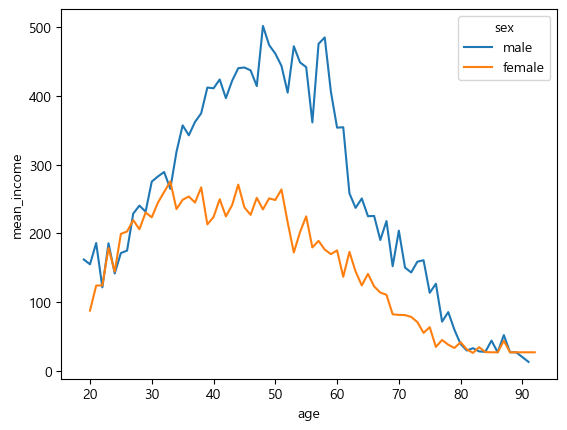

In [130]:
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

#p248 직업별 월급차이

In [131]:
welfare['code_job'].dtypes

dtype('float64')

In [132]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [133]:
list_job = pd.read_excel('./data/Koweps_Codebook_2019.xlsx', sheet_name= '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [134]:
list_job.shape

(156, 2)

In [135]:
welfare = welfare.merge(list_job, how='left', on='code_job')

In [136]:
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [137]:
#p250 직업별 월급차이 분석하기 
job_income = welfare.dropna(subset=['job', 'income']).groupby('job', as_index=False).agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [138]:
#월급이 많은 직업 상위 10위 추출

top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [139]:
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

<Axes: xlabel='mean_income', ylabel='job'>

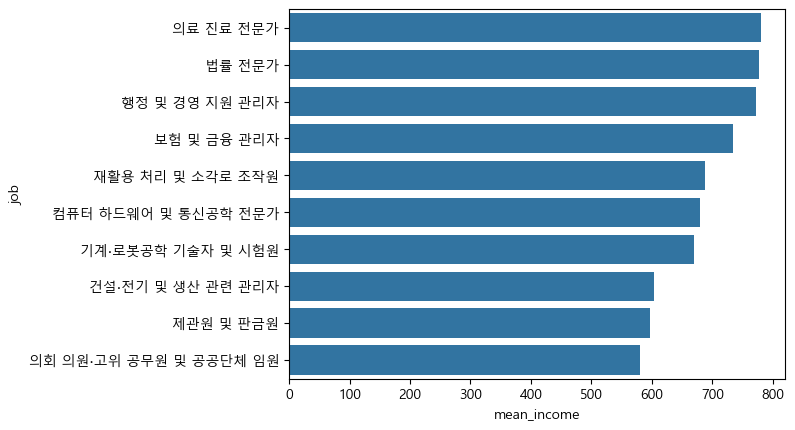

In [140]:
#p252
sns.barplot(data=top10, y='job', x='mean_income')

In [141]:
#하위 월급 10위 추출
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

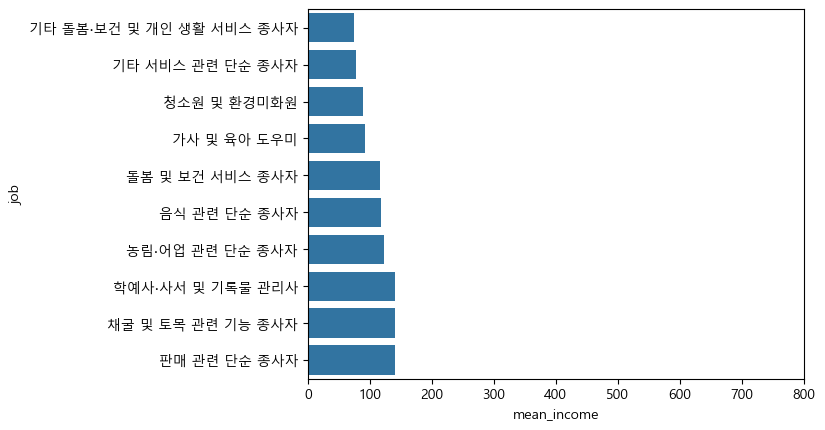

In [142]:
sns.barplot(data=bottom10, y='job', x='mean_income').set(xlim = (0, 800))

#성별 직업 빈도 p255

In [143]:
# 남성 직업 빈도 상위 10개

job_male = welfare.dropna(subset=['job']).query('sex == "male"').groupby('job', as_index=False).agg(n = ('job', 'count')).sort_values('n', ascending=False).head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [144]:
# 여성 직업 빈도 상위 10개

# 남성 직업 빈도 상위 10개

job_female = welfare.dropna(subset=['job']).query('sex == "female"').groupby('job', as_index=False).agg(n = ('job', 'count')).sort_values('n', ascending=False).head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

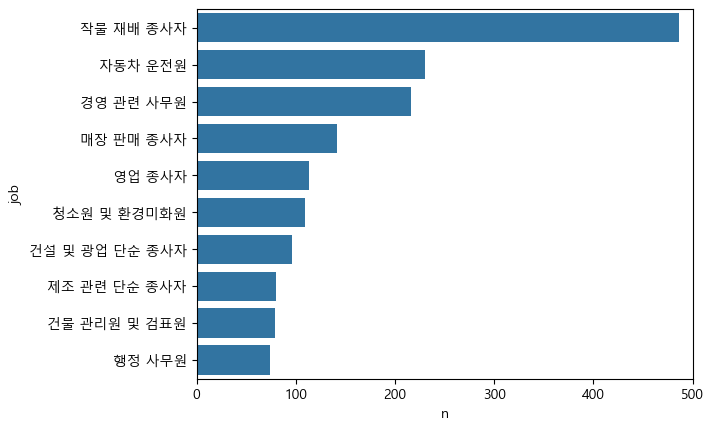

In [145]:
#남성 작업 빈도 막대 그래프 p257

sns.barplot(data=job_male, y='job', x='n').set(xlim = (0, 500))

[(0.0, 500.0)]

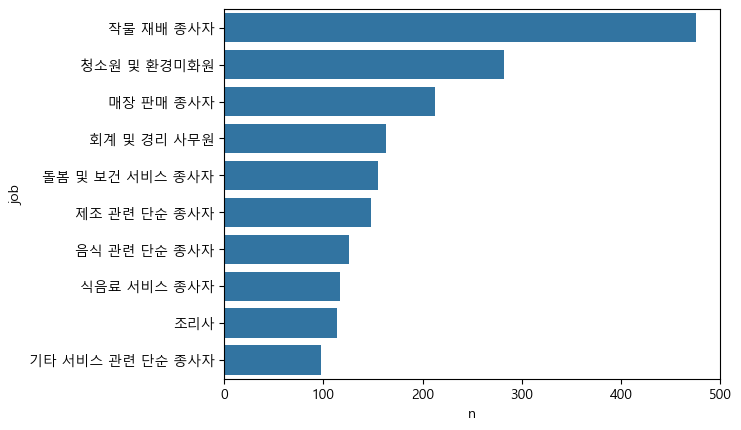

In [146]:
#여성 작업 빈도 막대 그래프 p257

sns.barplot(data=job_female, y='job', x='n').set(xlim = (0, 500))

#종교 유무에 따른 이혼율 p259

In [147]:
welfare['religion'].dtypes

dtype('float64')

In [148]:
welfare['religion'].value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [149]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

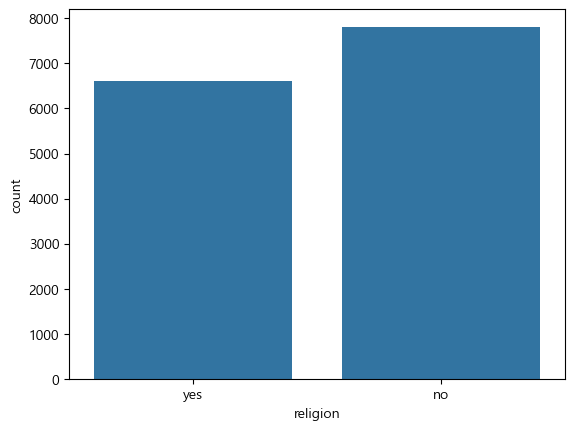

In [150]:
sns.countplot(data=welfare, x='religion')

In [151]:
#p261

welfare['marriage_type'].dtypes

dtype('float64')

In [152]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [153]:
#p262
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                    np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [154]:
n_divorce = welfare.groupby('marriage', as_index=False).agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

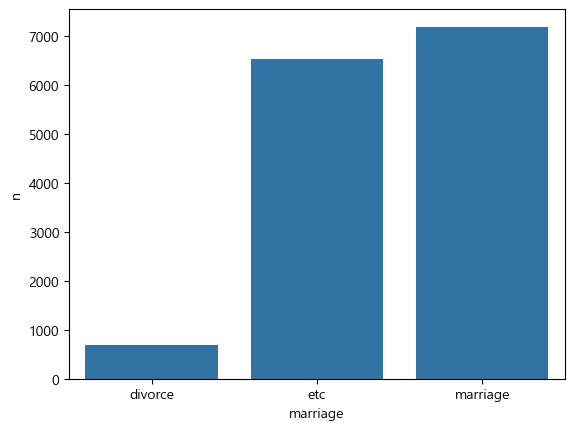

In [155]:
sns.barplot(data=n_divorce, x='marriage', y='n')

In [156]:
#p263 종교 유무에 따른 이혼율 분석

In [157]:
rel_div = welfare.query('marriage != "etc"').groupby('religion', as_index=False)\
    ['marriage'].value_counts(normalize=True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [158]:
rel_div = rel_div.query('marriage == "divorce"').assign(proportion = rel_div['proportion']\
                                                       *100).round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

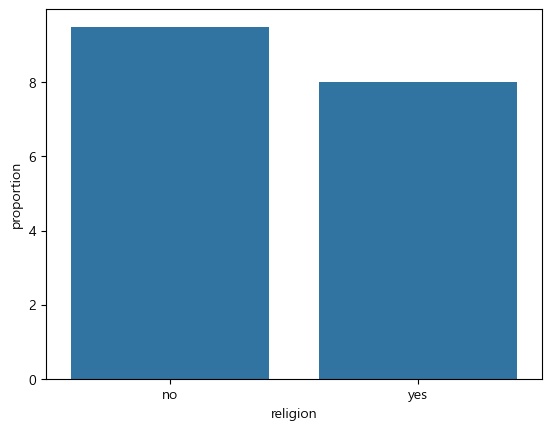

In [159]:
sns.barplot(data=rel_div, x='religion', y='proportion')

In [160]:
# p264 연령대 및 종교 유무에 따른 이혼율 분석

age_div = welfare.query('marriage != "etc"')\
.groupby('ageg', as_index=False)['marriage'].value_counts(normalize=True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000


In [163]:
welfare[(welfare['ageg'] == 'young') & (welfare['marriage'] == 'divorce')]


,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5,age,ageg,job,marriage
4944,3137.0,1.0,1.0,31370101.0,0.0,NaN,2.520735,2.333165,11305.377866,10464.134533,...,NaN,NaN,2400.0,NaN,0.0,NaN,26.0,young,건설∙전기 및 생산 관련 관리자,divorce
6966,4397.0,12.0,1.0,43971201.0,0.0,NaN,4.425748,4.696753,19849.270000,21064.714161,...,NaN,3774.0,NaN,NaN,0.0,NaN,27.0,young,기타 군인,divorce
12937,8886.0,7.0,1.0,88860701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,29.0,young,NaN,divorce


In [161]:
welfare.query('marriage != "etc"')\
.groupby('ageg', as_index=False)['marriage'].value_counts()


,ageg,marriage,count
0,middle,marriage,3552
1,middle,divorce,350
2,old,marriage,3581
3,old,divorce,336
4,young,marriage,57
5,young,divorce,3


In [162]:
age_div = age_div.query('ageg != "young" & marriage == "divorce"')\
.assign(proportion = age_div['proportion']*100).round(1)
age_div

,ageg,marriage,proportion
1,middle,divorce,9.0
3,old,divorce,8.6


<Axes: xlabel='ageg', ylabel='proportion'>

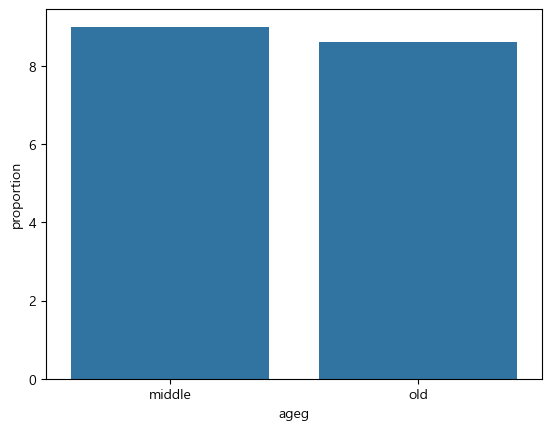

In [164]:
sns.barplot(data=age_div, x='ageg', y='proportion')

In [165]:
#p267 연령대 종교 유무에 따른 이혼율표 만들기

age_rel_div = welfare.query('marriage != "etc" & ageg != "young"')\
                    .groupby(['ageg', 'religion'], as_index=False)['marriage']\
                    .value_counts(normalize=True)
age_rel_div


,ageg,religion,marriage,proportion
0,middle,no,marriage,0.904953
1,middle,no,divorce,0.095047
2,middle,yes,marriage,0.917520
3,middle,yes,divorce,0.082480
4,old,no,marriage,0.904382
5,old,no,divorce,0.095618
6,old,yes,marriage,0.922222
7,old,yes,divorce,0.077778


In [167]:
age_rel_div = age_rel_div.query('marriage == "divorce"')\
                        .assign(proportion = age_rel_div['proportion']*100).round(1)
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.5
3,middle,yes,divorce,8.2
5,old,no,divorce,9.6
7,old,yes,divorce,7.8


<Axes: xlabel='ageg', ylabel='proportion'>

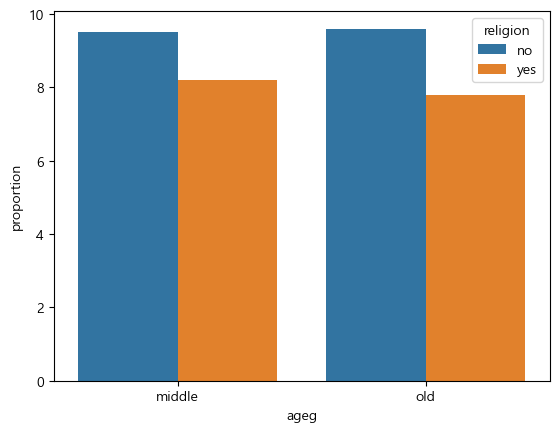

In [168]:
sns.barplot(data=age_rel_div, x='ageg', y='proportion', hue='religion')

#p268 지역별 연령대 비율 - 어느 지역에 노년층이 많을까

In [170]:
welfare['code_region'].dtypes

dtype('float64')

In [171]:
welfare['code_region'].value_counts()

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [172]:
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region' : ['서울',
                            '수도권(인천/경기)',
                            '부산/경남/울산',
                            '대구/경북',
                            '대전/충남',
                            '강원/충북',
                            '광주/전남/준북/제주도']})
list_job

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [173]:
welfare = welfare.merge(list_region, how='left', on='code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [174]:
region_ageg = welfare.groupby('region', as_index=False)['ageg'].value_counts(normalize=True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/준북/제주도,old,0.449311
4,광주/전남/준북/제주도,middle,0.317924
5,광주/전남/준북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


<Axes: xlabel='proportion', ylabel='region'>

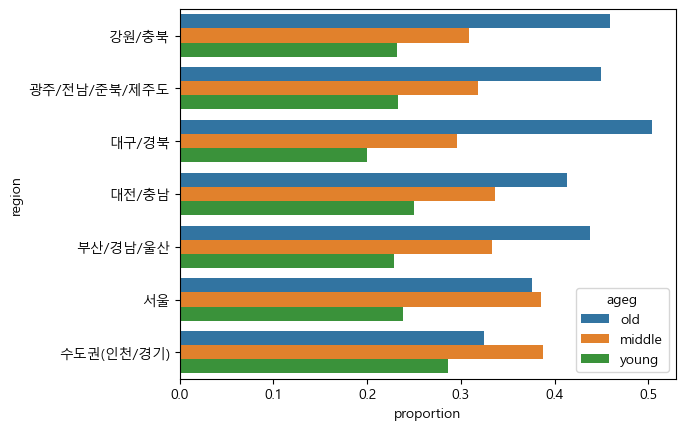

In [175]:
sns.barplot(data=region_ageg, y='region', x='proportion', hue='ageg')

In [178]:
pivot_df = region_ageg[['region', 'ageg', 'proportion']].\
    pivot(index = 'region', columns = 'ageg', values = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,0.308707,0.459103,0.232190
광주/전남/준북/제주도,0.317924,0.449311,0.232766
대구/경북,0.296296,0.504051,0.199653
대전/충남,0.336449,0.413372,0.250180
부산/경남/울산,0.333742,0.437500,0.228758
서울,0.385115,0.376124,0.238761
수도권(인천/경기),0.388170,0.325015,0.286815


<Axes: ylabel='region'>

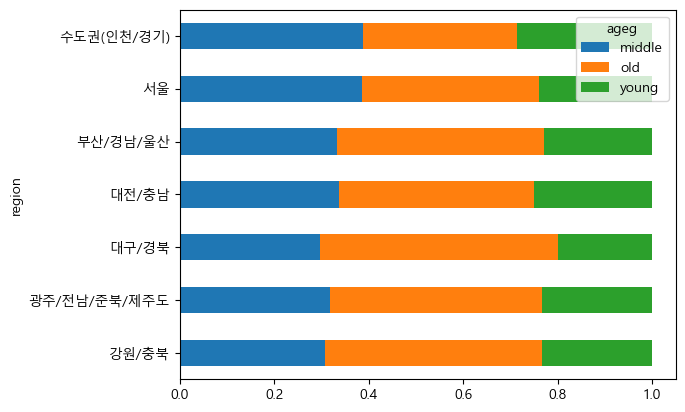

In [ ]:
pivot_df.plot.barh(stacked = True)
#누적가로막대 만들기

In [ ]:
#p274 노년층 비율 기준 정렬, 변수 순서 바꾸기

reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df                                                                   

ageg,young,middle,old
region,,,
수도권(인천/경기),0.286815,0.388170,0.325015
서울,0.238761,0.385115,0.376124
대전/충남,0.250180,0.336449,0.413372
부산/경남/울산,0.228758,0.333742,0.437500
광주/전남/준북/제주도,0.232766,0.317924,0.449311
강원/충북,0.232190,0.308707,0.459103
대구/경북,0.199653,0.296296,0.504051


<Axes: ylabel='region'>

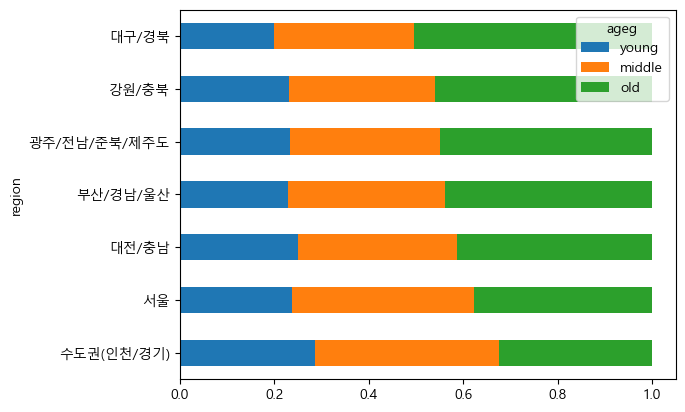

In [182]:
reorder_df.plot.barh(stacked = True)